In [2]:
import numpy as np
import seaborn as sbn
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
dataset = pd.read_csv(r'D:\Projects\house-prices-advanced-regression-techniques\train.csv')

In [5]:
dataset.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

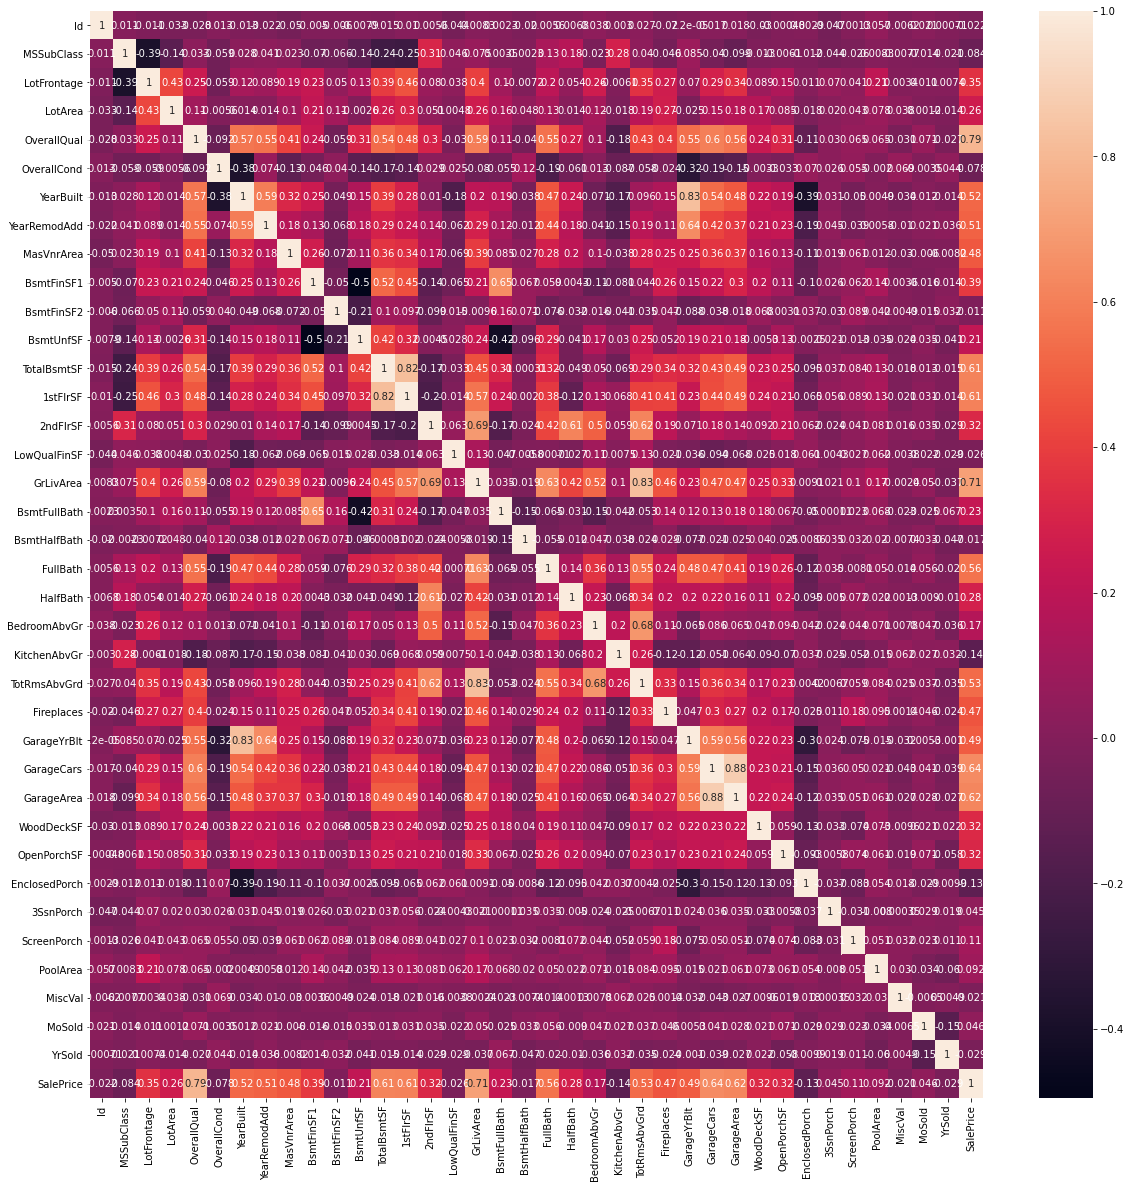

In [7]:
corr_matrix = dataset.corr()
plt.figure(figsize = (20,20))
sbn.heatmap(corr_matrix,annot=True)
plt.show()

In [8]:
# Important factors deciding the sale price
#1. OverallQual
#2. GarageCars
#3. Yearbuilt
#4. GrLivArea
#5. TotalBsmtSF
#6. FullBath

In [9]:
finaldata = dataset

In [10]:
y = finaldata.iloc[:,-1].values

In [11]:
print(y)

[208500 181500 223500 ... 266500 142125 147500]


In [12]:
finaldata.drop(finaldata.columns.difference(['OverallQual','GarageCars','YearBuilt','GrLivArea','TotalBsmtSF','FullBath']), 1, inplace=True)

In [13]:
finaldata.isnull().sum()

OverallQual    0
YearBuilt      0
TotalBsmtSF    0
GrLivArea      0
FullBath       0
GarageCars     0
dtype: int64

In [14]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   YearBuilt    1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   GrLivArea    1460 non-null   int64
 4   FullBath     1460 non-null   int64
 5   GarageCars   1460 non-null   int64
dtypes: int64(6)
memory usage: 68.6 KB


In [15]:
X = finaldata.iloc[:,:].values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.1)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
accuracy_LinReg = regressor.score(X_test,y_test)
accuracy_LinReg

0.793702373896937

In [22]:
# Polynomial regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train,y_train)

LinearRegression()

In [24]:
accuracy_PolyReg = lin_reg_2.score(X_test,y_test)
accuracy_PolyReg


0.793702373896937

In [25]:
# Non linear SVR

In [26]:
from sklearn.svm import SVR
svr = SVR(kernel= 'rbf')
svr.fit(X_train,y_train)

SVR()

In [27]:
accuracy_svr = svr.score(X_test,y_test)
accuracy_svr

-0.0352338887444581

In [28]:
# Descion tree regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [30]:
accuracy_dtr = dtr.score(X_test,y_test)
accuracy_dtr

0.6964801421336974

In [31]:
# Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators =10,random_state=0)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [33]:
accuracy_rfr = rfr.score(X_test,y_test)
accuracy_rfr

0.8012520843874065

In [34]:
# XGBoost regressor

In [36]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(random_state =0)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
accuracy_xgbr = xgbr.score(X_test,y_test)
accuracy_xgbr

0.8120458534497575

In [ ]:
# Artificial Neural Network

In [138]:
ann = tf.keras.models.Sequential()

In [139]:
ann.add(tf.keras.layers.Dense(units =128,activation='relu',kernel_initializer='normal'))

In [140]:
ann.add(tf.keras.layers.Dense(units =256,activation='relu',kernel_initializer='normal'))

In [141]:
ann.add(tf.keras.layers.Dense(units =256,activation='relu',kernel_initializer='normal'))

In [142]:
ann.add(tf.keras.layers.Dense(units =256,activation='relu',kernel_initializer='normal'))

In [143]:
ann.add(tf.keras.layers.Dense(units =1,kernel_initializer='normal',activation='linear'))

In [147]:
ann.compile(optimizer ='RMSprop' , loss = 'mean_squared_error',metrics = ['mean_absolute_error'])

In [148]:
ann.fit(X_train,y_train,batch_size=32,epochs=500)

Epoch 1/500
42/42 [==============================] - 0s 3ms/step - loss: 934860864.0000 - mean_absolute_error: 19967.2285
Epoch 2/500
42/42 [==============================] - 0s 3ms/step - loss: 948759488.0000 - mean_absolute_error: 19892.2930
Epoch 3/500
42/42 [==============================] - 0s 3ms/step - loss: 928685888.0000 - mean_absolute_error: 19628.3691
Epoch 4/500
42/42 [==============================] - 0s 3ms/step - loss: 928056896.0000 - mean_absolute_error: 19571.7871
Epoch 5/500
42/42 [==============================] - 0s 3ms/step - loss: 945190208.0000 - mean_absolute_error: 19898.6230
Epoch 6/500
42/42 [==============================] - 0s 3ms/step - loss: 939702272.0000 - mean_absolute_error: 19620.9922
Epoch 7/500
42/42 [==============================] - 0s 3ms/step - loss: 919808128.0000 - mean_absolute_error: 19492.7031
Epoch 8/500
42/42 [==============================] - 0s 3ms/step - loss: 936416384.0000 - mean_absolute_error: 19746.9121
Epoch 9/500
42/42 [=====

42/42 [==============================] - 0s 3ms/step - loss: 916451520.0000 - mean_absolute_error: 19315.0156
Epoch 68/500
42/42 [==============================] - 0s 3ms/step - loss: 938241088.0000 - mean_absolute_error: 19507.8301
Epoch 69/500
42/42 [==============================] - 0s 3ms/step - loss: 896431808.0000 - mean_absolute_error: 19338.5273
Epoch 70/500
42/42 [==============================] - 0s 3ms/step - loss: 922980672.0000 - mean_absolute_error: 19639.7559
Epoch 71/500
42/42 [==============================] - 0s 3ms/step - loss: 924616384.0000 - mean_absolute_error: 19496.3516
Epoch 72/500
42/42 [==============================] - 0s 3ms/step - loss: 920914944.0000 - mean_absolute_error: 19593.4375
Epoch 73/500
42/42 [==============================] - 0s 3ms/step - loss: 925674368.0000 - mean_absolute_error: 19412.8359
Epoch 74/500
42/42 [==============================] - 0s 3ms/step - loss: 924642560.0000 - mean_absolute_error: 19496.1758
Epoch 75/500
42/42 [=========

42/42 [==============================] - 0s 3ms/step - loss: 870071424.0000 - mean_absolute_error: 19064.4512
Epoch 134/500
42/42 [==============================] - 0s 3ms/step - loss: 902222656.0000 - mean_absolute_error: 19328.1523
Epoch 135/500
42/42 [==============================] - 0s 3ms/step - loss: 886789632.0000 - mean_absolute_error: 19067.9609
Epoch 136/500
42/42 [==============================] - 0s 3ms/step - loss: 909798272.0000 - mean_absolute_error: 19089.8867
Epoch 137/500
42/42 [==============================] - 0s 3ms/step - loss: 901909120.0000 - mean_absolute_error: 19063.4922
Epoch 138/500
42/42 [==============================] - 0s 3ms/step - loss: 903002560.0000 - mean_absolute_error: 19230.5488
Epoch 139/500
42/42 [==============================] - 0s 3ms/step - loss: 888327936.0000 - mean_absolute_error: 18793.0020
Epoch 140/500
42/42 [==============================] - 0s 3ms/step - loss: 886027456.0000 - mean_absolute_error: 19065.4375
Epoch 141/500
42/42 [=

42/42 [==============================] - 0s 3ms/step - loss: 872510016.0000 - mean_absolute_error: 18727.2852
Epoch 199/500
42/42 [==============================] - 0s 3ms/step - loss: 853620544.0000 - mean_absolute_error: 18704.3535
Epoch 200/500
42/42 [==============================] - 0s 3ms/step - loss: 839916544.0000 - mean_absolute_error: 18683.7715
Epoch 201/500
42/42 [==============================] - 0s 3ms/step - loss: 864764992.0000 - mean_absolute_error: 18733.6426
Epoch 202/500
42/42 [==============================] - 0s 3ms/step - loss: 853403392.0000 - mean_absolute_error: 18984.9570
Epoch 203/500
42/42 [==============================] - 0s 3ms/step - loss: 853811200.0000 - mean_absolute_error: 18864.6484
Epoch 204/500
42/42 [==============================] - 0s 3ms/step - loss: 863084352.0000 - mean_absolute_error: 18801.3945
Epoch 205/500
42/42 [==============================] - 0s 3ms/step - loss: 858938880.0000 - mean_absolute_error: 18698.7617
Epoch 206/500
42/42 [=

42/42 [==============================] - 0s 3ms/step - loss: 835455808.0000 - mean_absolute_error: 18459.3281
Epoch 265/500
42/42 [==============================] - 0s 3ms/step - loss: 841344256.0000 - mean_absolute_error: 18407.6074
Epoch 266/500
42/42 [==============================] - 0s 3ms/step - loss: 846861760.0000 - mean_absolute_error: 18419.8926
Epoch 267/500
42/42 [==============================] - 0s 3ms/step - loss: 834590016.0000 - mean_absolute_error: 18280.3965
Epoch 268/500
42/42 [==============================] - 0s 3ms/step - loss: 821497472.0000 - mean_absolute_error: 18227.8770
Epoch 269/500
42/42 [==============================] - 0s 3ms/step - loss: 837584576.0000 - mean_absolute_error: 18488.5332
Epoch 270/500
42/42 [==============================] - 0s 3ms/step - loss: 858121472.0000 - mean_absolute_error: 18455.4395
Epoch 271/500
42/42 [==============================] - 0s 3ms/step - loss: 814917056.0000 - mean_absolute_error: 18388.9824
Epoch 272/500
42/42 [=

42/42 [==============================] - 0s 3ms/step - loss: 816366720.0000 - mean_absolute_error: 17902.4180
Epoch 331/500
42/42 [==============================] - 0s 3ms/step - loss: 791278912.0000 - mean_absolute_error: 17763.6582
Epoch 332/500
42/42 [==============================] - 0s 3ms/step - loss: 806153792.0000 - mean_absolute_error: 17958.4375
Epoch 333/500
42/42 [==============================] - 0s 3ms/step - loss: 811309696.0000 - mean_absolute_error: 18032.4219
Epoch 334/500
42/42 [==============================] - 0s 3ms/step - loss: 799748224.0000 - mean_absolute_error: 18092.7129
Epoch 335/500
42/42 [==============================] - 0s 3ms/step - loss: 799594240.0000 - mean_absolute_error: 18209.1133
Epoch 336/500
42/42 [==============================] - 0s 3ms/step - loss: 819196416.0000 - mean_absolute_error: 18069.1562
Epoch 337/500
42/42 [==============================] - 0s 3ms/step - loss: 809467776.0000 - mean_absolute_error: 17929.0430
Epoch 338/500
42/42 [=

42/42 [==============================] - 0s 3ms/step - loss: 782433152.0000 - mean_absolute_error: 18028.5410
Epoch 396/500
42/42 [==============================] - 0s 3ms/step - loss: 775769152.0000 - mean_absolute_error: 17532.6152
Epoch 397/500
42/42 [==============================] - 0s 3ms/step - loss: 792821632.0000 - mean_absolute_error: 17721.5215
Epoch 398/500
42/42 [==============================] - 0s 3ms/step - loss: 803978560.0000 - mean_absolute_error: 17959.9355
Epoch 399/500
42/42 [==============================] - 0s 3ms/step - loss: 761699328.0000 - mean_absolute_error: 17610.8105
Epoch 400/500
42/42 [==============================] - 0s 3ms/step - loss: 783835584.0000 - mean_absolute_error: 17550.5410
Epoch 401/500
42/42 [==============================] - ETA: 0s - loss: 821879104.0000 - mean_absolute_error: 17801.6367 - 0s 3ms/step - loss: 821332672.0000 - mean_absolute_error: 17890.8457
Epoch 402/500
42/42 [==============================] - 0s 3ms/step - loss: 7804

42/42 [==============================] - 0s 3ms/step - loss: 753800192.0000 - mean_absolute_error: 17573.6289
Epoch 461/500
42/42 [==============================] - 0s 3ms/step - loss: 772778944.0000 - mean_absolute_error: 17601.8730
Epoch 462/500
42/42 [==============================] - 0s 3ms/step - loss: 777806720.0000 - mean_absolute_error: 17347.2266
Epoch 463/500
42/42 [==============================] - 0s 3ms/step - loss: 723877248.0000 - mean_absolute_error: 17159.6172
Epoch 464/500
42/42 [==============================] - 0s 3ms/step - loss: 775682688.0000 - mean_absolute_error: 17515.2129
Epoch 465/500
42/42 [==============================] - 0s 3ms/step - loss: 774258880.0000 - mean_absolute_error: 17466.2188
Epoch 466/500
42/42 [==============================] - 0s 3ms/step - loss: 754879488.0000 - mean_absolute_error: 17427.3125
Epoch 467/500
42/42 [==============================] - 0s 3ms/step - loss: 747692224.0000 - mean_absolute_error: 17514.4609
Epoch 468/500
42/42 [=

In [146]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[187329.16 160200.  ]
 [181429.31 175000.  ]
 [130114.67 119500.  ]
 [169737.98 171500.  ]
 [203126.88 158000.  ]
 [127489.03 115000.  ]
 [206718.88 196500.  ]
 [124440.09 105500.  ]
 [142782.05  98000.  ]
 [246313.5  277000.  ]
 [121045.58 128200.  ]
 [192771.83 181000.  ]
 [238505.53 227000.  ]
 [208716.81 205950.  ]
 [237680.19 225000.  ]
 [330300.   394617.  ]
 [ 97977.02 125500.  ]
 [182401.06 184100.  ]
 [201733.83 203000.  ]
 [168359.97 151000.  ]
 [267765.25 201000.  ]
 [ 85729.84  75500.  ]
 [220064.92 179900.  ]
 [103219.23 107000.  ]
 [147683.81 135000.  ]
 [115292.05 129000.  ]
 [141301.03 132000.  ]
 [236913.88 265979.  ]
 [272941.47 228000.  ]
 [ 77495.95  96500.  ]
 [145714.98 141000.  ]
 [136261.38 159500.  ]
 [370228.56 276000.  ]
 [148437.02 141500.  ]
 [145394.34 148500.  ]
 [152757.77 115000.  ]
 [121221.42 118500.  ]
 [305576.19 267000.  ]
 [157762.22 210000.  ]
 [305219.72 275000.  ]
 [292848.19 281000.  ]
 [190933.83 215000.  ]
 [278045.03 216837.  ]
 [191983.09